In [1]:
import json
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [2]:
import wget
import requests 
import numpy as np
import pandas as pd

In [3]:
#Getting the dataset
srcsm_json = requests.get('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json')

In [4]:
#Getting a quick view of the data
print(srcsm_json.text[0:450])

[
{"article_link": "https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5", "headline": "former versace store clerk sues over secret 'black code' for minority shoppers", "is_sarcastic": 0},
{"article_link": "https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365", "headline": "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "is_sarcastic": 0},


In [5]:
sentences=[]
labels=[]

for item in srcsm_json.json():
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [6]:
#Splitting the dataset into Train and Test
training_size=round(len(sentences)*0.75)

training_sentences=sentences[0:training_size]
training_labels=labels[0:training_size]

testing_sentences=sentences[training_size:]
testing_labels=labels[training_size:]

#Tokenizer
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer=Tokenizer(num_words=10000,oov_token="OOV")
tokenizer.fit_on_texts(training_sentences)

word_index=tokenizer.word_index

In [7]:
# Creating padded sequences
vocab_size = 10000
oov_tok = "<oov>"
max_length = 80
trunc_type='post'
padding_type='post'

training_sequences=tokenizer.texts_to_sequences(training_sentences)
training_padded=pad_sequences(training_sequences, maxlen=80,padding="post",truncating="post")

testing_sequences=tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(testing_sequences, maxlen=80,padding="post",truncating="post")

In [13]:
embedding_dim=20

model1=Sequential()
model1.add(Embedding(vocab_size,embedding_dim,input_length=max_length))
model1.add(Dropout(0.4))
model1.add(Bidirectional(LSTM(30)))
model1.add(Dropout(0.4))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 80, 20)            200000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 80, 20)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 60)                12240     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 212,301
Trainable params: 212,301
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [15]:
history = model1.fit(training_padded, training_labels, epochs=5,batch_size=10, validation_data=(testing_padded, testing_labels), verbose=1)

Train on 20032 samples, validate on 6677 samples
Epoch 1/5
20032/20032 [==============================] - 152s 8ms/sample - loss: 0.4188 - accuracy: 0.7988 - val_loss: 0.3308 - val_accuracy: 0.8529
Epoch 2/5
20032/20032 [==============================] - 147s 7ms/sample - loss: 0.2520 - accuracy: 0.8958 - val_loss: 0.3332 - val_accuracy: 0.8556
Epoch 3/5
20032/20032 [==============================] - 143s 7ms/sample - loss: 0.1871 - accuracy: 0.9264 - val_loss: 0.3500 - val_accuracy: 0.8550
Epoch 4/5
20032/20032 [==============================] - 141s 7ms/sample - loss: 0.1494 - accuracy: 0.9424 - val_loss: 0.3732 - val_accuracy: 0.8529
Epoch 5/5
20032/20032 [==============================] - 145s 7ms/sample - loss: 0.1208 - accuracy: 0.9553 - val_loss: 0.3971 - val_accuracy: 0.8520


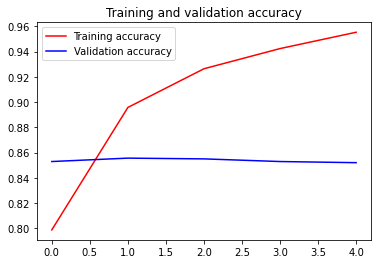

<Figure size 432x288 with 0 Axes>

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

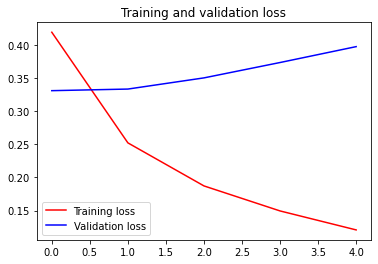

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [18]:
model1.save('model.h5')

In [ ]:
#check
sentence=["Mom scolded and tpold me that I can't get a girlfriend",
         "Ranchi has been declared a red-zone area due to rising number of COVID-19 patients"]
sequences=tokenizer.texts_to_sequences(sentence)
padded=pad_sequences(sequences,maxlen=max_length,padding=padding_type,truncating=trunc_type)
print(model.predict(padded))